In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sys
import utils.file_utils as fu

RUNPATH="/data/prevel/runs/154_17:30/"

#RUNPATH="./fullrun"

In [2]:
flag_first=True
for gen in fu.file_list(RUNPATH,file_format=".csv"):
    ndf=pd.read_csv(gen)
    if flag_first:
        full_df=ndf
        flag_first=False
    else:
        full_df=pd.concat([full_df,ndf],axis="index")
full_df.index=full_df.iloc[:,0]
full_df.head()

,uid,solsol_wf,solta_wf,gasgas_wf,tata_wl,ta_bl,sol_activitybasal,fit_stable,fit_cor,fit_rms,fit_energy,fit_corhip,fit_corknee,fit_corankle,fit_rmship,fit_rmsknee,fit_rmsankle,gen
uid,,,,,,,,,,,,,,,,,,
gen9ind1,gen9ind1,0.874925,0.722370,1.254715,1.547402,0.477817,0.083544,1,4.312310,-29.920554,-29.289232,74.021825,-49.244871,-11.840024,-11.991140,-13.832157,-4.097257,9
gen9ind2,gen9ind2,0.986195,0.668351,0.677042,1.698062,0.394938,0.093752,1,9.771562,-31.054447,-30.237513,68.128978,-47.850651,9.036359,-13.111352,-13.982683,-3.960413,9
gen9ind3,gen9ind3,1.161722,0.656166,0.816738,1.598015,0.395743,0.108221,1,5.272116,-30.464181,-31.247828,72.837210,-49.829312,-7.191550,-12.244633,-14.122150,-4.097398,9
gen9ind4,gen9ind4,1.093847,0.870822,1.041580,1.585664,0.392256,0.104241,1,4.458046,-30.076759,-30.900794,73.800396,-49.287312,-11.138947,-11.926672,-14.054442,-4.095644,9
gen9ind5,gen9ind5,1.085166,0.713677,0.742798,1.605476,0.285410,0.106213,1,8.204113,-30.484193,-32.420025,71.182649,-49.215473,2.645164,-12.459617,-14.035074,-3.989503,9


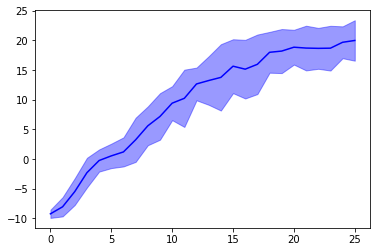

In [3]:
dev=full_df.groupby('gen').std()
mu=full_df.groupby('gen').mean()
from utils.plot_utils import plot_mean_std_fill
ax=plot_mean_std_fill(mu.fit_cor,dev.fit_cor,'b')

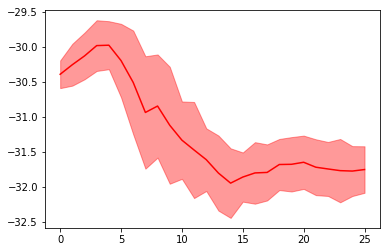

In [4]:
plot_mean_std_fill(mu.fit_rms,dev.fit_rms,'r')

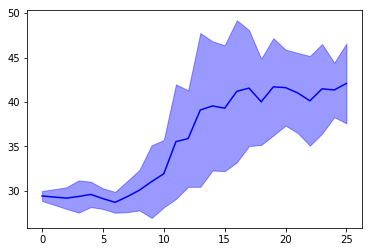

In [5]:
plot_mean_std_fill(mu.fit_energy.abs(),dev.fit_energy.abs(),'b')

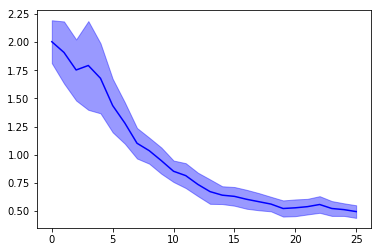

In [6]:
ax=plot_mean_std_fill(mu.solsol_wf,dev.solsol_wf,'b')


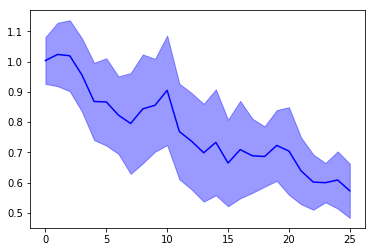

In [7]:
ax=plot_mean_std_fill(mu.solta_wf,dev.solta_wf,'b')

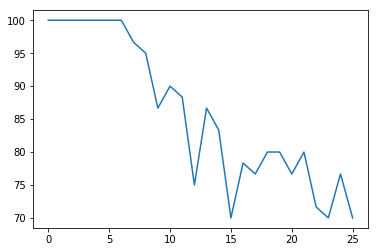

In [8]:
stab=full_df[full_df.fit_stable==1]
plt.plot(100*stab.groupby("gen").uid.count()/60)

In [9]:
stab.sort_values("fit_corankle",ascending=False)

,uid,solsol_wf,solta_wf,gasgas_wf,tata_wl,ta_bl,sol_activitybasal,fit_stable,fit_cor,fit_rms,fit_energy,fit_corhip,fit_corknee,fit_corankle,fit_rmship,fit_rmsknee,fit_rmsankle,gen
uid,,,,,,,,,,,,,,,,,,
gen25ind57,gen25ind57,0.511281,0.579358,0.549568,2.493053,0.188146,0.139662,1,22.989056,-31.941782,-44.146826,67.153837,-50.604485,52.417817,-14.310004,-14.244390,-3.387387,25
gen24ind53,gen24ind53,0.511281,0.561927,0.523473,2.493053,0.185524,0.141443,1,23.063111,-32.053992,-44.172025,69.276883,-51.839012,51.751461,-14.265228,-14.430291,-3.358474,24
gen25ind37,gen25ind37,0.468220,0.508571,0.357811,1.435299,0.199632,0.141443,1,23.622572,-31.930024,-41.210276,68.221296,-48.684989,51.331410,-14.344691,-14.308550,-3.276783,25
gen24ind17,gen24ind17,0.553778,0.473473,0.513920,1.598233,0.270077,0.120173,1,22.232910,-31.850425,-39.728744,68.318898,-52.929891,51.309722,-14.206696,-14.327107,-3.316622,24
gen25ind42,gen25ind42,0.468220,0.643155,0.502450,1.472234,0.180960,0.141755,1,22.468366,-31.846881,-41.739448,68.673378,-51.837472,50.569193,-14.170611,-14.367556,-3.308715,25
gen22ind12,gen22ind12,0.553778,0.484499,0.473478,1.720751,0.366362,0.113311,1,22.220759,-31.943269,-37.853483,67.534421,-51.075676,50.203533,-14.287110,-14.355985,-3.300174,22
gen24ind19,gen24ind19,0.494659,0.643155,0.579394,1.472234,0.248049,0.139448,1,23.271929,-31.929830,-40.890738,70.755264,-50.984447,50.044971,-14.158655,-14.491482,-3.279693,24
gen23ind24,gen23ind24,0.494659,0.711074,0.579394,1.518900,0.248049,0.139448,1,22.904975,-31.980773,-40.840739,69.230125,-50.512307,49.997106,-14.296034,-14.424219,-3.260520,23
gen25ind58,gen25ind58,0.452322,0.561927,0.579394,2.493053,0.158733,0.141443,1,22.480511,-31.640351,-47.203888,69.939645,-52.431211,49.933099,-14.130618,-14.199364,-3.310368,25


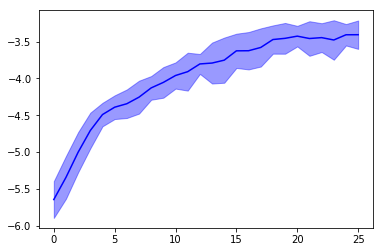

In [10]:
ax=plot_mean_std_fill(mu.fit_rmsankle,dev.fit_rmsankle,'b')

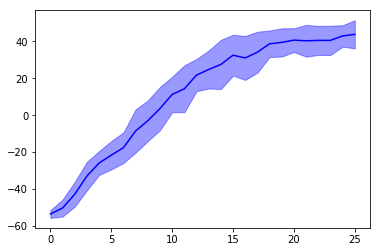

In [11]:
ax=plot_mean_std_fill(mu.fit_corankle,dev.fit_corankle,'b')